In [1]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

from tts_king import TTSKing

In [2]:
tts_king = TTSKing(config_path='config.yaml')

FileNotFoundError: [Errno 2] No such file or directory: '/home/dev/other/fsp/data/ailabs_processed/stats.json'

In [4]:
mel_postnet = tts_king.generate_mel("Ohh gosh I sound like a robot bip boop 0 1 0 1 1 1 0")

Raw Text Sequence: Ohh gosh I sound like a robot bip boop 0 1 0 1 1 1 0
Phoneme Sequence: {OW1 G AA1 SH AY1 S AW1 N D L AY1 K AH0 R OW1 B AA2 T B IH1 P B UW1 P Z IH1 R OW0 W AH1 N Z IH1 R OW0 W AH1 N W AH1 N W AH1 N Z IH1 R OW0}


In [5]:
mel_postnet_np = np.array(mel_postnet.detach().cpu())[0]

/opt/conda/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
/opt/conda/lib/python3.7/site-packages/librosa/display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


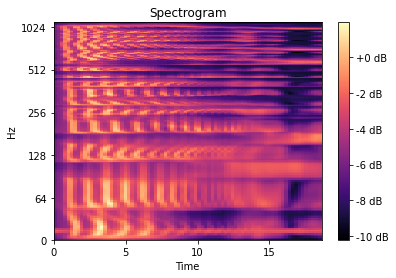

In [6]:
%matplotlib inline
librosa.display.specshow(mel_postnet_np, sr=2200, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram')
plt.show()

In [7]:
wav = tts_king.mel_to_wav(mel_postnet)

In [8]:
import IPython.display as ipd
ipd.Audio(wav[0][0], rate=22050) 

### WORK IN PROGRESS

In [8]:
tts_king.prepare_dataset_lj_speech()

FileNotFoundError: [Errno 2] No such file or directory: '../ljspeech_dataset_processed/TextGrid/LJ001-0001.TextGrid'